In [1]:
from PIL import Image
import numpy as np
import random

## Loading backgrounds ##

In [2]:
back1 = Image.open("./data_gen/background1.jpg")
back2 = Image.open("./data_gen/background2.jpg")
back3 = Image.open("./data_gen/background3.jpg")

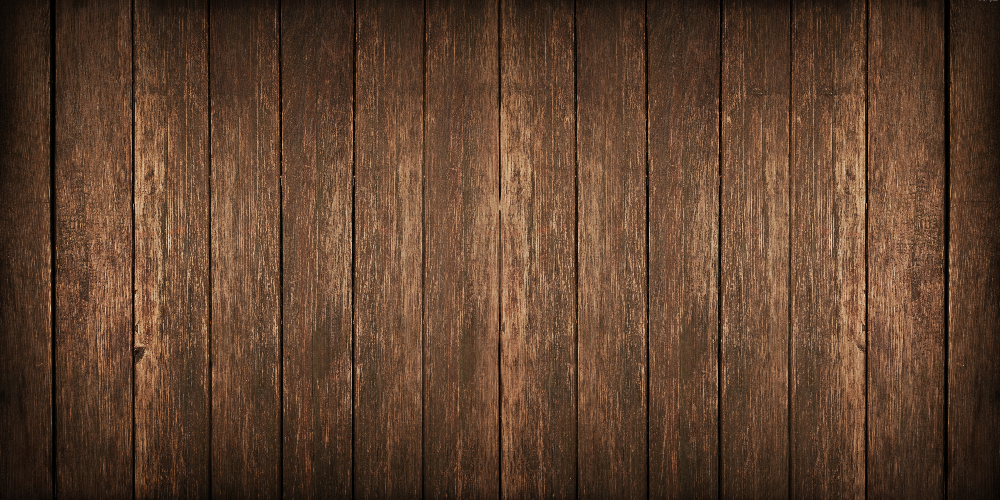

In [12]:
back1.resize((1000,500))

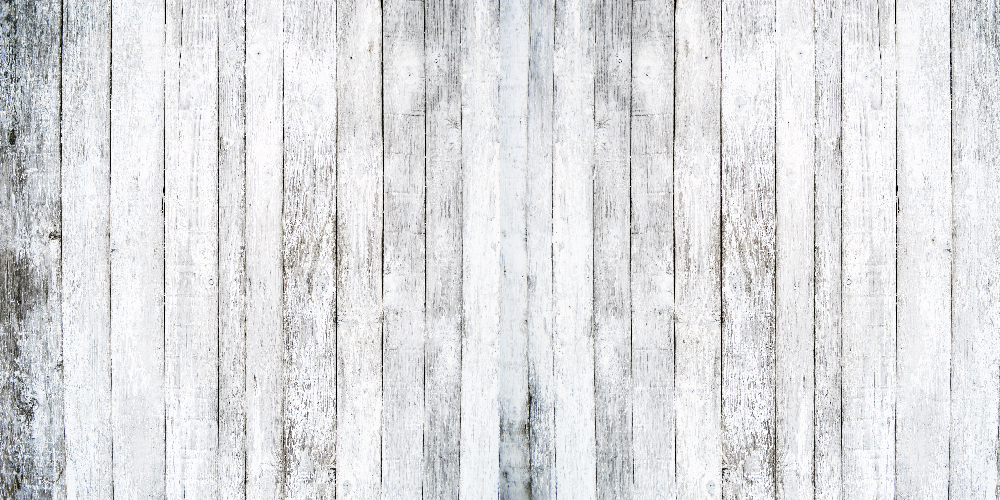

In [13]:
back2.resize((1000,500))

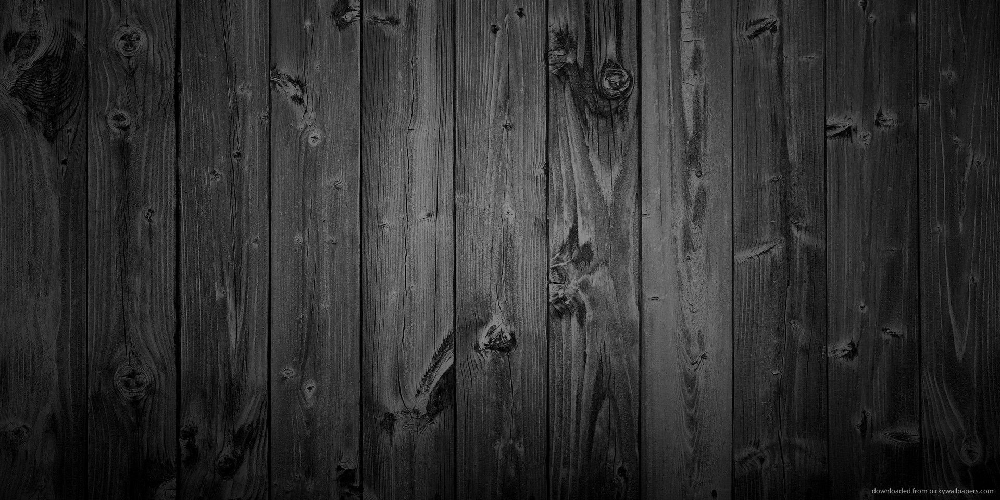

In [14]:
back3.resize((1000,500))

## Loading bees ##

In [15]:
bee1 = Image.open("./data_gen/bee1.png")
bee2 = Image.open("./data_gen/bee2.png")
bee3 = Image.open("./data_gen/bee3.png")

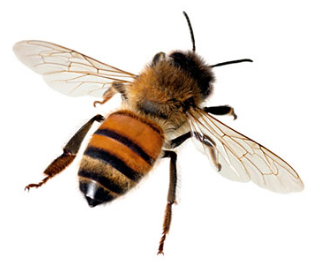

In [16]:
bee1

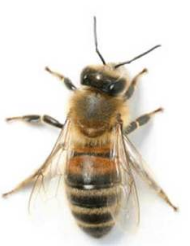

In [17]:
bee2

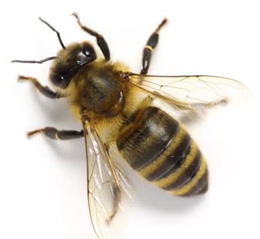

In [18]:
bee3

In [ ]:
#im.rotate(45).show()

Achtung!:
- we have to resize both bees and backgrounds to get readable result,
- we can use rotating functions,
- we have to handle white background of bees images

In [22]:
print(bee1.size)
print(bee2.size)
print(bee3.size)

(319, 263)
(190, 246)
(260, 239)


In [111]:
# 4 times smaller
bee1r = bee1.resize((int(bee1.size[0] / 4), int(bee1.size[1] / 4)))
bee2r = bee2.resize((int(bee2.size[0] / 4), int(bee2.size[1] / 4)))
bee3r = bee3.resize((int(bee3.size[0] / 4), int(bee3.size[1] / 4)))

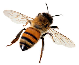

In [29]:
bee1r

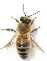

In [31]:
bee2r

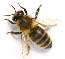

In [32]:
bee3r

## Time to generate some images! ##

In [112]:
def generate_image(background, bees, num_of_bees):
    '''
        background - PIL image
        bees - list of PIL images
    '''
    new_image = np.array(background)
    
    for _ in range(int(num_of_bees / len(bees))):
        for bee in bees:
            coord_x = random.randint(0, background.size[1] - bee.size[1])
            coord_y = random.randint(0, background.size[0] - bee.size[0])
            
            # pasting bee at (coord_x, coord_y)
            bee_arr = np.array(bee)
            for x in range(bee.size[1]):
                for y in range(bee.size[0]):
                    if bee_arr[x, y] < 230: # we don't change background value when it's almost white
                        new_image[x + coord_x, y + coord_y] = bee_arr[x, y]
    
    return new_image

In [113]:
# we consider only gray-scale images, TODO - try with RGB images

In [88]:
bees = [bee1r.convert('L') , bee2r.convert('L') , bee3r.convert('L')]

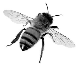

In [89]:
bees[0]

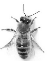

In [90]:
bees[1]

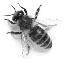

In [91]:
bees[2]

In [106]:
back3.size

(1920, 1080)

In [107]:
background = back2.resize((1000,500)).convert('L')

In [108]:
img = generate_image(background, bees, 60)

In [109]:
img

array([[147, 121, 103, ..., 213, 233, 172],
       [126, 134, 141, ..., 190, 240, 182],
       [ 61, 143, 166, ..., 240, 233, 168],
       ...,
       [203, 168, 140, ..., 184, 177, 234],
       [171, 182, 169, ..., 215, 170, 247],
       [158, 189, 221, ..., 236, 167, 243]], dtype=uint8)

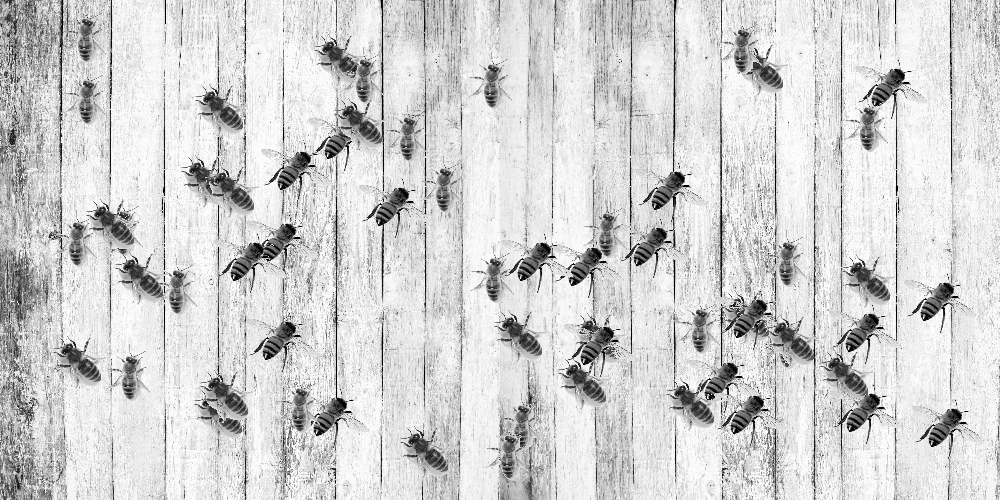

In [110]:
Image.fromarray(img, 'L')